# Fashion MNIST with PyTorch

Based on https://pytorch.org/tutorials/beginner/nn_tutorial.html

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_openml

In [2]:
data = fetch_openml(name="Fashion-MNIST", version=1)

In [3]:
X = data["data"]
X["Target"] = data["target"]
X = X.sample(frac=1).reset_index(drop=True)
y = X["Target"].copy().astype(int)
del X["Target"]
X = X / 255
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.003922,...,0.000000,0.000000,0.0,0.000000,0.690196,0.682353,0.137255,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.619608,0.627451,0.0,0.423529,0.862745,0.545098,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.003922,0.0,0.003922,0.0,0.0,0.0,0.007843,...,0.294118,0.121569,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.156863,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [4]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.000003,0.000025,0.000135,0.000388,0.000972,0.001603,0.003149,0.008645,0.022098,0.056510,...,0.135617,0.091328,0.065144,0.069896,0.089757,0.070463,0.033428,0.010790,0.003281,0.000286
std,0.000343,0.001163,0.004709,0.009643,0.017287,0.022911,0.032104,0.055362,0.092937,0.149758,...,0.225822,0.191903,0.165000,0.172163,0.203346,0.177379,0.115796,0.068179,0.036308,0.008353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.223529,0.031373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.062745,0.176471,0.854902,0.725490,0.890196,0.901961,0.878431,0.882353,0.996078,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667


In [5]:
y

0        3
1        4
2        7
3        6
4        0
        ..
69995    5
69996    8
69997    9
69998    9
69999    7
Name: Target, Length: 70000, dtype: int64

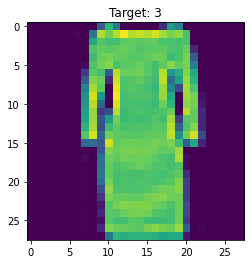

In [6]:
def plot_image_by_index(i):
    plt.imshow(X.iloc[i].values.reshape(28,28))
    plt.title(f"Target: {y.iloc[i]}")


plot_image_by_index(159)

# torch model

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [8]:
import torch

In [9]:
y_train.values

array([1, 0, 3, ..., 3, 8, 4])

In [10]:
"""pandas to torch"""

x_train, y_train, x_test, y_test = map(
    torch.tensor, (
        x_train.values,
        y_train.values,
        x_test.values,
        y_test.values
    )
)

In [11]:
def log_softmax(x):
    """
    activation function
    """
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def manual_model(xb):
    """
    linear model layer with log softmax activation
    param xb: training batch
    """
    return log_softmax(xb @ weights + bias)  # @ is matrix multiplication

def nll_loss(preds, target):
    """
    negative log likelihood
    """
    return -preds[range(target.shape[0]), target].mean()

def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()


In [12]:
"""
manual nn with torch tensors form scratch
"""

weights = (torch.randn(784, 10) / math.sqrt(784)).double()  # "Xavier initialisation"
weights.requires_grad_()  # trailing _ in pytorch means "inplace"
bias = torch.zeros(10, requires_grad=True)

lr = 0.01  # learning rate
epochs = 2  # how many epochs to train for
n, c = x_train.shape
bs = 60

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = manual_model(xb)
        loss = nll_loss(pred, yb)
        if i % 100 == 0 or i <= 10:
            print(i, loss)
        
        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()
            
print(accuracy(manual_model(x_test), y_test))

0 tensor(2.4528, dtype=torch.float64, grad_fn=<NegBackward0>)
1 tensor(2.4641, dtype=torch.float64, grad_fn=<NegBackward0>)
2 tensor(2.2877, dtype=torch.float64, grad_fn=<NegBackward0>)
3 tensor(2.2162, dtype=torch.float64, grad_fn=<NegBackward0>)
4 tensor(2.2598, dtype=torch.float64, grad_fn=<NegBackward0>)
5 tensor(2.2631, dtype=torch.float64, grad_fn=<NegBackward0>)
6 tensor(2.1948, dtype=torch.float64, grad_fn=<NegBackward0>)
7 tensor(2.1464, dtype=torch.float64, grad_fn=<NegBackward0>)
8 tensor(2.2416, dtype=torch.float64, grad_fn=<NegBackward0>)
9 tensor(2.2116, dtype=torch.float64, grad_fn=<NegBackward0>)
10 tensor(2.1269, dtype=torch.float64, grad_fn=<NegBackward0>)
100 tensor(1.2949, dtype=torch.float64, grad_fn=<NegBackward0>)
200 tensor(1.0230, dtype=torch.float64, grad_fn=<NegBackward0>)
300 tensor(0.9081, dtype=torch.float64, grad_fn=<NegBackward0>)
400 tensor(0.8658, dtype=torch.float64, grad_fn=<NegBackward0>)
500 tensor(0.8400, dtype=torch.float64, grad_fn=<NegBackward0

In [13]:
"""
Same using nn module
"""

from torch import nn
import torch.nn.functional as F

class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784, 10).double() / math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))
        self.lr = 0.01
        self.bs = 64
        self.epochs = 2

    def forward(self, xb):
        return log_softmax(xb @ self.weights + self.bias)

    
    def fit(self, x_train, y_train):
        n, c = x_train.shape
        for epoch in range(self.epochs):
            for i in range((n - 1) // self.bs + 1):
                start_i = i * self.bs
                end_i = start_i + self.bs
                xb = x_train[start_i:end_i]
                yb = y_train[start_i:end_i]
                pred = self.forward(xb)
                loss = nll_loss(pred, yb)
                if i % 100 == 0 or i <= 10:
                    print(f"Epoch {epoch}, it {i}: loss {round(loss.item(), 3)}")

                loss.backward()
                with torch.no_grad():
                    for p in model.parameters():
                        p -= p.grad * self.lr
                    model.zero_grad()
        print(f"\nAccuracy on test set: {accuracy(model(x_test), y_test)}")

model = Mnist_Logistic()
model.fit(x_train, y_train)

Epoch 0, it 0: loss 2.37
Epoch 0, it 1: loss 2.272
Epoch 0, it 2: loss 2.308
Epoch 0, it 3: loss 2.325
Epoch 0, it 4: loss 2.235
Epoch 0, it 5: loss 2.182
Epoch 0, it 6: loss 2.141
Epoch 0, it 7: loss 2.146
Epoch 0, it 8: loss 2.137
Epoch 0, it 9: loss 2.139
Epoch 0, it 10: loss 2.053
Epoch 0, it 100: loss 1.332
Epoch 0, it 200: loss 0.959
Epoch 0, it 300: loss 1.011
Epoch 0, it 400: loss 0.88
Epoch 0, it 500: loss 0.774
Epoch 0, it 600: loss 0.863
Epoch 0, it 700: loss 0.737
Epoch 1, it 0: loss 0.824
Epoch 1, it 1: loss 0.717
Epoch 1, it 2: loss 0.99
Epoch 1, it 3: loss 0.762
Epoch 1, it 4: loss 0.791
Epoch 1, it 5: loss 0.697
Epoch 1, it 6: loss 0.759
Epoch 1, it 7: loss 0.857
Epoch 1, it 8: loss 0.733
Epoch 1, it 9: loss 0.741
Epoch 1, it 10: loss 0.608
Epoch 1, it 100: loss 0.815
Epoch 1, it 200: loss 0.595
Epoch 1, it 300: loss 0.772
Epoch 1, it 400: loss 0.738
Epoch 1, it 500: loss 0.628
Epoch 1, it 600: loss 0.734
Epoch 1, it 700: loss 0.624

Accuracy on test set: 0.784805178642

In [14]:
"""
Using nn module with automations and fancy stuff
"""

from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lr = 0.01
        self.bs = 128
        self.epochs = 10
        self.lin = nn.Linear(784, 10)
        self.opt = optim.SGD(self.parameters(), lr=self.lr, momentum=.9)
        self.loss = F.cross_entropy
        
    def forward(self, xb):
        return log_softmax(self.lin(xb.float()))
    
    def fit(self, x_train, y_train, x_test, y_test):
        train_ds = TensorDataset(x_train, y_train)
        train_dl = DataLoader(train_ds, batch_size=self.bs)
        test_ds = TensorDataset(x_test, y_test)
        test_dl = DataLoader(test_ds, batch_size=bs * 2)
        n, c = x_train.shape
        for epoch in range(self.epochs):
            model.train() # flags training mode needed for certain layers like bathc normalization and dropout
            for i, (xb, yb) in enumerate(train_dl):
                loss = self.loss(self.forward(xb), yb) # TODO: equivalent here to using nll_loss, why exactly?
                if i % 100 == 0:
                    print(f"Epoch {epoch}, it {i}: loss {round(loss.item(), 3)}")

                loss.backward()
                self.opt.step()
                self.opt.zero_grad()
            model.eval() # flags test mode
            with torch.no_grad():
                valid_loss = sum(self.loss(self.forward(xb), yb) for xb, yb in test_dl) / len(test_dl)
                print(f"\tValidation loss after epoch: {round(valid_loss.item(), 3)}")
        
        print(f"\nAccuracy on full test set: {accuracy(model(x_test), y_test)}")

model = Mnist_Logistic()
model.fit(x_train, y_train, x_test, y_test)

Epoch 0, it 0: loss 2.315
Epoch 0, it 100: loss 0.529
Epoch 0, it 200: loss 0.719
Epoch 0, it 300: loss 0.588
	Validation loss after epoch: 0.574
Epoch 1, it 0: loss 0.55
Epoch 1, it 100: loss 0.372
Epoch 1, it 200: loss 0.63
Epoch 1, it 300: loss 0.514
	Validation loss after epoch: 0.521
Epoch 2, it 0: loss 0.487
Epoch 2, it 100: loss 0.343
Epoch 2, it 200: loss 0.599
Epoch 2, it 300: loss 0.48
	Validation loss after epoch: 0.498
Epoch 3, it 0: loss 0.454
Epoch 3, it 100: loss 0.328
Epoch 3, it 200: loss 0.582
Epoch 3, it 300: loss 0.458
	Validation loss after epoch: 0.484
Epoch 4, it 0: loss 0.432
Epoch 4, it 100: loss 0.319
Epoch 4, it 200: loss 0.571
Epoch 4, it 300: loss 0.443
	Validation loss after epoch: 0.474
Epoch 5, it 0: loss 0.416
Epoch 5, it 100: loss 0.312
Epoch 5, it 200: loss 0.562
Epoch 5, it 300: loss 0.432
	Validation loss after epoch: 0.467
Epoch 6, it 0: loss 0.404
Epoch 6, it 100: loss 0.306
Epoch 6, it 200: loss 0.555
Epoch 6, it 300: loss 0.422
	Validation loss 

In [15]:
"""
Fully Connected Dense NN
"""

"""
Using nn module with automations and fancy stuff
"""

from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lr = 0.01
        self.bs = 128
        self.epochs = 10
        self.lin1 = nn.Linear(784, 256)
        self.lin2 = nn.Linear(256, 10)
        self.lin3 = nn.Linear(10, 10)
        self.opt = optim.SGD(self.parameters(), lr=self.lr, momentum=.9)
        self.loss = F.cross_entropy
        
    def forward(self, xb):
        xb = F.relu(self.lin1(xb.float()))
        xb = F.relu(self.lin2(xb))
        xb = F.relu(self.lin3(xb))
        return log_softmax(xb)
    
    def fit(self, x_train, y_train, x_test, y_test):
        train_ds = TensorDataset(x_train, y_train)
        train_dl = DataLoader(train_ds, batch_size=self.bs)
        test_ds = TensorDataset(x_test, y_test)
        test_dl = DataLoader(test_ds, batch_size=bs * 2)
        n, c = x_train.shape
        for epoch in range(self.epochs):
            model.train() # flags training mode needed for certain layers like bathc normalization and dropout
            for i, (xb, yb) in enumerate(train_dl):
                loss = self.loss(self.forward(xb), yb) # TODO: equivalent here to using nll_loss, why exactly?
                if i % 100 == 0:
                    print(f"Epoch {epoch}, it {i}: loss {round(loss.item(), 3)}")

                loss.backward()
                self.opt.step()
                self.opt.zero_grad()
            model.eval() # flags test mode
            with torch.no_grad():
                valid_loss = sum(self.loss(self.forward(xb), yb) for xb, yb in test_dl) / len(test_dl)
                print(f"\tValidation loss after epoch: {round(valid_loss.item(), 3)}")
        
        print(f"\nAccuracy on full test set: {accuracy(model(x_test), y_test)}")

model = Mnist_Logistic()
model.fit(x_train, y_train, x_test, y_test)

Epoch 0, it 0: loss 2.313
Epoch 0, it 100: loss 1.954
Epoch 0, it 200: loss 1.769
Epoch 0, it 300: loss 1.676
	Validation loss after epoch: 1.552
Epoch 1, it 0: loss 1.679
Epoch 1, it 100: loss 1.412
Epoch 1, it 200: loss 1.595
Epoch 1, it 300: loss 1.578
	Validation loss after epoch: 1.508
Epoch 2, it 0: loss 1.64
Epoch 2, it 100: loss 1.399
Epoch 2, it 200: loss 1.514
Epoch 2, it 300: loss 1.565
	Validation loss after epoch: 1.488
Epoch 3, it 0: loss 1.612
Epoch 3, it 100: loss 1.395
Epoch 3, it 200: loss 1.484
Epoch 3, it 300: loss 1.545
	Validation loss after epoch: 1.47
Epoch 4, it 0: loss 1.588
Epoch 4, it 100: loss 1.363
Epoch 4, it 200: loss 1.456
Epoch 4, it 300: loss 1.531
	Validation loss after epoch: 1.466
Epoch 5, it 0: loss 1.577
Epoch 5, it 100: loss 1.355
Epoch 5, it 200: loss 1.436
Epoch 5, it 300: loss 1.519
	Validation loss after epoch: 1.456
Epoch 6, it 0: loss 1.566
Epoch 6, it 100: loss 1.347
Epoch 6, it 200: loss 1.428
Epoch 6, it 300: loss 1.508
	Validation loss

In [16]:
"""
ConvNN
"""

class Mnist_ConvNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lr = 0.01
        self.bs = 64
        self.epochs = 10
        
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)
        
        self.opt = optim.SGD(self.parameters(), lr=self.lr, momentum=.9)
        self.loss = F.cross_entropy
        
    def forward(self, xb):
        
        xb = xb.float().view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return log_softmax(xb.view(-1, xb.size(1)))
    
        #return log_softmax(self.lin(xb.float()))
    
    def fit(self, x_train, y_train, x_test, y_test):
        train_ds = TensorDataset(x_train, y_train)
        train_dl = DataLoader(train_ds, batch_size=self.bs)
        test_ds = TensorDataset(x_test, y_test)
        test_dl = DataLoader(test_ds, batch_size=bs * 2)
        n, c = x_train.shape
        for epoch in range(self.epochs):
            model.train() # flags training mode needed for certain layers like bathc normalization and dropout
            for i, (xb, yb) in enumerate(train_dl):
                loss = self.loss(self.forward(xb), yb) # TODO: equivalent here to using nll_loss, why exactly?
                if i % 100 == 0:
                    print(f"Epoch {epoch}, it {i}: loss {round(loss.item(), 3)}")

                loss.backward()
                self.opt.step()
                self.opt.zero_grad()
            model.eval() # flags test mode
            with torch.no_grad():
                valid_loss = sum(self.loss(self.forward(xb), yb) for xb, yb in test_dl) / len(test_dl)
                print(f"\tValidation loss after epoch: {round(valid_loss.item(), 3)}")
        
        print(f"\nAccuracy on full test set: {accuracy(model(x_test), y_test)}")

model = Mnist_ConvNN()
model.fit(x_train, y_train, x_test, y_test)

Epoch 0, it 0: loss 2.309
Epoch 0, it 100: loss 2.302
Epoch 0, it 200: loss 2.28
Epoch 0, it 300: loss 2.169
Epoch 0, it 400: loss 1.496
Epoch 0, it 500: loss 1.353
Epoch 0, it 600: loss 1.384
Epoch 0, it 700: loss 0.903
	Validation loss after epoch: 1.088
Epoch 1, it 0: loss 1.265
Epoch 1, it 100: loss 1.098
Epoch 1, it 200: loss 0.774
Epoch 1, it 300: loss 1.015
Epoch 1, it 400: loss 0.995
Epoch 1, it 500: loss 0.805
Epoch 1, it 600: loss 0.924
Epoch 1, it 700: loss 0.548
	Validation loss after epoch: 0.806
Epoch 2, it 0: loss 1.037
Epoch 2, it 100: loss 0.936
Epoch 2, it 200: loss 0.527
Epoch 2, it 300: loss 0.783
Epoch 2, it 400: loss 0.771
Epoch 2, it 500: loss 0.579
Epoch 2, it 600: loss 0.887
Epoch 2, it 700: loss 0.427
	Validation loss after epoch: 0.709
Epoch 3, it 0: loss 1.032
Epoch 3, it 100: loss 0.745
Epoch 3, it 200: loss 0.48
Epoch 3, it 300: loss 0.766
Epoch 3, it 400: loss 0.704
Epoch 3, it 500: loss 0.51
Epoch 3, it 600: loss 0.85
Epoch 3, it 700: loss 0.389
	Validat